https://iq.opengenus.org/basics-of-machine-learning-image-classification-techniques/

https://www.geeksforgeeks.org/python-image-classification-using-keras/

https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/

https://github.com/hasabo/Machine-Learning/blob/master/Python/Image_Classification%20/Image_Classification.ipynb  

# Importing Libraries

In [1]:
import os
import cv2 
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Loading Dataset

In [2]:
class_names = ['Benign cases','Malignant cases', 'Normal cases']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (224, 224)

In [3]:
def load_data():
  
    datasets = ['train', 'test']
    output = []    
    for dataset in datasets:        
        images = []
        labels = []        
        print("Loading {}".format(dataset))
        
        
        for folder in os.listdir(dataset):
            label = class_names_label[folder]            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):                
                img_path = os.path.join(os.path.join(dataset, folder), file)                
                image = cv2.imread(img_path)
                image = cv2.resize(image, IMAGE_SIZE)                 
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))
        
    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading train


100%|███████████████████████████████████████████████████████████████████████████████| 332/332 [00:00<00:00, 338.68it/s]


Loading test


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 372.93it/s]


# Shuffle Data 

In [5]:
from sklearn.utils import shuffle 
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

# Exploratory Data Analysis

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 876
Number of testing examples: 221
Each image is of size: (224, 224)


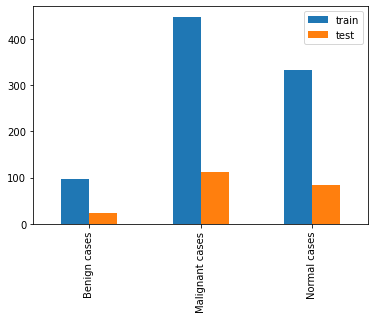

In [7]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

pd.DataFrame({'train': train_counts,
              'test': test_counts}, 
             index=class_names).plot.bar()

plt.show()

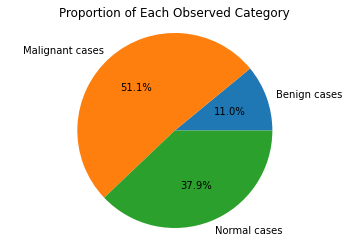

In [8]:
plt.pie(train_counts,
        explode=None, 
        labels=class_names,
        autopct='%1.1f%%')

plt.axis('equal')
plt.title('Proportion of Each Observed Category')
plt.show()

# Data Preprocessing

In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

### Make Data 1D for compatability with Standard Classifiers

In [10]:
X_trainShape = train_images.shape[1]*train_images.shape[2]*train_images.shape[3]
X_testShape = test_images.shape[1]*test_images.shape[2]*test_images.shape[3]

X_trainFlat = train_images.reshape(train_images.shape[0], X_trainShape)
X_testFlat = test_images.reshape(test_images.shape[0], X_testShape)

# Machine Learning Models

# Decision Tree

In [11]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_trainFlat, train_labels)

DecisionTreeClassifier()

In [12]:
y_pred1 = tree.predict(X_testFlat)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred1)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred1)* 100}")

Accuracy is: 89.59276018099548


Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.93      0.93      0.93       113
           2       0.89      0.88      0.89        84

    accuracy                           0.90       221
   macro avg       0.86      0.87      0.86       221
weighted avg       0.90      0.90      0.90       221

Confusion Matrix : 


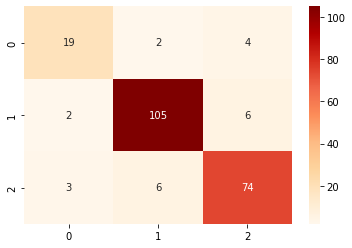

In [14]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred1))

cm = confusion_matrix(y_pred1, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [15]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred1))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred1)))

MAE: 0.13574660633484162
MSE: 0.19909502262443438
RMSE: 0.4462006528731602


In [16]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred1,average='weighted'))

Precision Score :  0.8965229242762908
Recall Score :  0.8959276018099548
f1_score :  0.8961780935312863


# Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_trainFlat, train_labels)

RandomForestClassifier()

In [18]:
y_pred3 = RandomForestClassifier.predict(X_testFlat)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred3)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred3)* 100}")

Accuracy is: 95.92760180995475


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.62      0.77        24
           1       0.98      1.00      0.99       113
           2       0.92      1.00      0.96        84

    accuracy                           0.96       221
   macro avg       0.97      0.88      0.91       221
weighted avg       0.96      0.96      0.96       221

Confusion Matrix : 


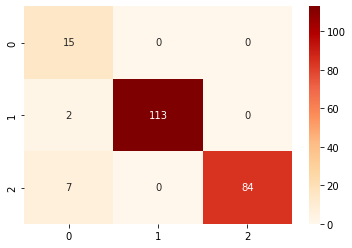

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred3))

cm = confusion_matrix(y_pred3, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred3))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred3)))

MAE: 0.07239819004524888
MSE: 0.13574660633484162
RMSE: 0.368438063091806


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred3,average='weighted'))

Precision Score :  0.9618698830188108
Recall Score :  0.9592760180995475
f1_score :  0.9552502732640862


# ExtraTreesClassifier

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_trainFlat, train_labels)

ExtraTreesClassifier()

In [24]:
y_pred5 = extratree.predict(X_testFlat)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred5)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred5)* 100}")

Accuracy is: 96.83257918552036


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.98      1.00      0.99       113
           2       0.94      1.00      0.97        84

    accuracy                           0.97       221
   macro avg       0.98      0.90      0.93       221
weighted avg       0.97      0.97      0.97       221

Confusion Matrix : 


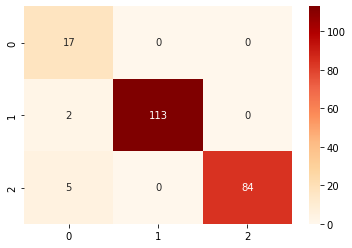

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred5))

cm = confusion_matrix(y_pred5, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred5))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred5)))

MAE: 0.05429864253393665
MSE: 0.09954751131221719
RMSE: 0.3155115074164763


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred5,average='weighted'))

Precision Score :  0.9697542148647065
Recall Score :  0.9683257918552036
f1_score :  0.965988530721606


# KNeighborsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_trainFlat, train_labels)

KNeighborsClassifier()

In [30]:
y_pred2 = KNeighborsClassifier.predict(X_testFlat)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred2)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred2)* 100}")

Accuracy is: 93.66515837104072


Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.98      0.97      0.98       113
           2       0.91      0.96      0.94        84

    accuracy                           0.94       221
   macro avg       0.90      0.87      0.88       221
weighted avg       0.93      0.94      0.93       221

Confusion Matrix : 


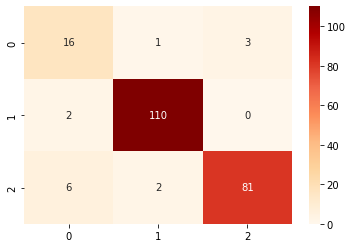

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred2))

cm = confusion_matrix(y_pred2, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred2))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred2)))

MAE: 0.10407239819004525
MSE: 0.18552036199095023
RMSE: 0.43072074710994623


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred2,average='weighted'))

Precision Score :  0.9349845296804979
Recall Score :  0.9366515837104072
f1_score :  0.9348524610000299


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_trainFlat, train_labels)

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_testFlat)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred4)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred4)* 100}")

Accuracy is: 96.83257918552036


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86        24
           1       1.00      0.99      1.00       113
           2       0.92      1.00      0.96        84

    accuracy                           0.97       221
   macro avg       0.97      0.91      0.94       221
weighted avg       0.97      0.97      0.97       221

Confusion Matrix : 


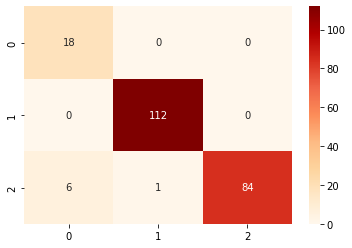

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred4))

cm = confusion_matrix(y_pred4, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred4))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred4)))

MAE: 0.058823529411764705
MSE: 0.11312217194570136
RMSE: 0.33633639699815626


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred4,average='weighted'))

Precision Score :  0.9707622694048034
Recall Score :  0.9683257918552036
f1_score :  0.9670099834805717


# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
classifier6 = LogisticRegression()
classifier6.fit(X_trainFlat, train_labels)

C:\Users\nafem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred6 = classifier6.predict(X_testFlat)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred6)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred6)* 100}")

Accuracy is: 97.73755656108597


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       1.00      0.99      1.00       113
           2       0.95      1.00      0.98        84

    accuracy                           0.98       221
   macro avg       0.97      0.94      0.95       221
weighted avg       0.98      0.98      0.98       221

Confusion Matrix : 


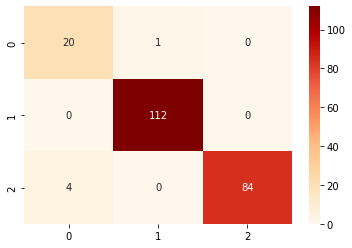

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred6))

cm = confusion_matrix(y_pred6, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Logistic Regression

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred6))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred6)))

MAE: 0.04072398190045249
MSE: 0.07692307692307693
RMSE: 0.2773500981126146


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred6, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred6,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred6,average='weighted'))

Precision Score :  0.9775518599048011
Recall Score :  0.9773755656108597
f1_score :  0.9768218223484981


# Support Vector Machine

In [47]:
from sklearn import svm
classifier7 = svm.SVC()
classifier7.fit(X_trainFlat, train_labels)

SVC()

In [48]:
y_pred7 = classifier7.predict(X_testFlat)

In [49]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(test_labels, y_pred7)}
print(f"Accuracy is: {accuracy_score(test_labels, y_pred7)* 100}")

Accuracy is: 96.38009049773756


Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        24
           1       0.99      1.00      1.00       113
           2       0.92      1.00      0.96        84

    accuracy                           0.96       221
   macro avg       0.97      0.89      0.92       221
weighted avg       0.97      0.96      0.96       221

Confusion Matrix : 


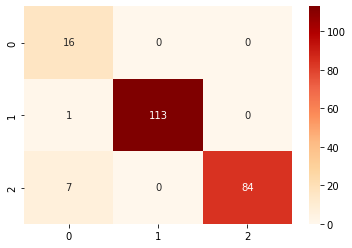

In [50]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(test_labels, y_pred7))

cm = confusion_matrix(y_pred7, test_labels)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Support Vector Machine

In [51]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_labels,y_pred7))
print('MSE:', metrics.mean_squared_error(test_labels, y_pred7))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred7)))

MAE: 0.06787330316742081
MSE: 0.13122171945701358
RMSE: 0.362245385694578


In [52]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, y_pred7, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(test_labels, y_pred7,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(test_labels, y_pred7,average='weighted'))

Precision Score :  0.9662770745171316
Recall Score :  0.9638009049773756
f1_score :  0.9608244463491936
